In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from tqdm import tqdm

In [2]:
df  = pd.read_csv("data/train.csv")
df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [27]:
df.tail()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100
122264,56045_2022-10-01,56045,Weston County,Wyoming,2022-10-01,1.785395,100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [6]:
df["cfips"].nunique()

3135

In [4]:
census_df  = pd.read_csv("data/census_starter.csv")
census_df.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pct_bb_2017            3142 non-null   float64
 1   pct_bb_2018            3142 non-null   float64
 2   pct_bb_2019            3142 non-null   float64
 3   pct_bb_2020            3141 non-null   float64
 4   pct_bb_2021            3141 non-null   float64
 5   cfips                  3142 non-null   int64  
 6   pct_college_2017       3142 non-null   float64
 7   pct_college_2018       3142 non-null   float64
 8   pct_college_2019       3142 non-null   float64
 9   pct_college_2020       3141 non-null   float64
 10  pct_college_2021       3141 non-null   float64
 11  pct_foreign_born_2017  3142 non-null   float64
 12  pct_foreign_born_2018  3142 non-null   float64
 13  pct_foreign_born_2019  3142 non-null   float64
 14  pct_foreign_born_2020  3141 non-null   float64
 15  pct_

In [7]:
test = pd.read_csv("data/test.csv")
test.head()

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01


In [28]:
sample_sub = pd.read_csv("data/sample_submission.csv")
sample_sub.head()

,row_id,microbusiness_density
0,1001_2022-11-01,3.817671
1,1003_2022-11-01,3.817671
2,1005_2022-11-01,3.817671
3,1007_2022-11-01,3.817671
4,1009_2022-11-01,3.817671


# EDA

In [11]:
census_df.dropna(inplace = True)

In [12]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pct_bb_2017            3138 non-null   float64
 1   pct_bb_2018            3138 non-null   float64
 2   pct_bb_2019            3138 non-null   float64
 3   pct_bb_2020            3138 non-null   float64
 4   pct_bb_2021            3138 non-null   float64
 5   cfips                  3138 non-null   int64  
 6   pct_college_2017       3138 non-null   float64
 7   pct_college_2018       3138 non-null   float64
 8   pct_college_2019       3138 non-null   float64
 9   pct_college_2020       3138 non-null   float64
 10  pct_college_2021       3138 non-null   float64
 11  pct_foreign_born_2017  3138 non-null   float64
 12  pct_foreign_born_2018  3138 non-null   float64
 13  pct_foreign_born_2019  3138 non-null   float64
 14  pct_foreign_born_2020  3138 non-null   float64
 15  pct_

number of numeric field:  26


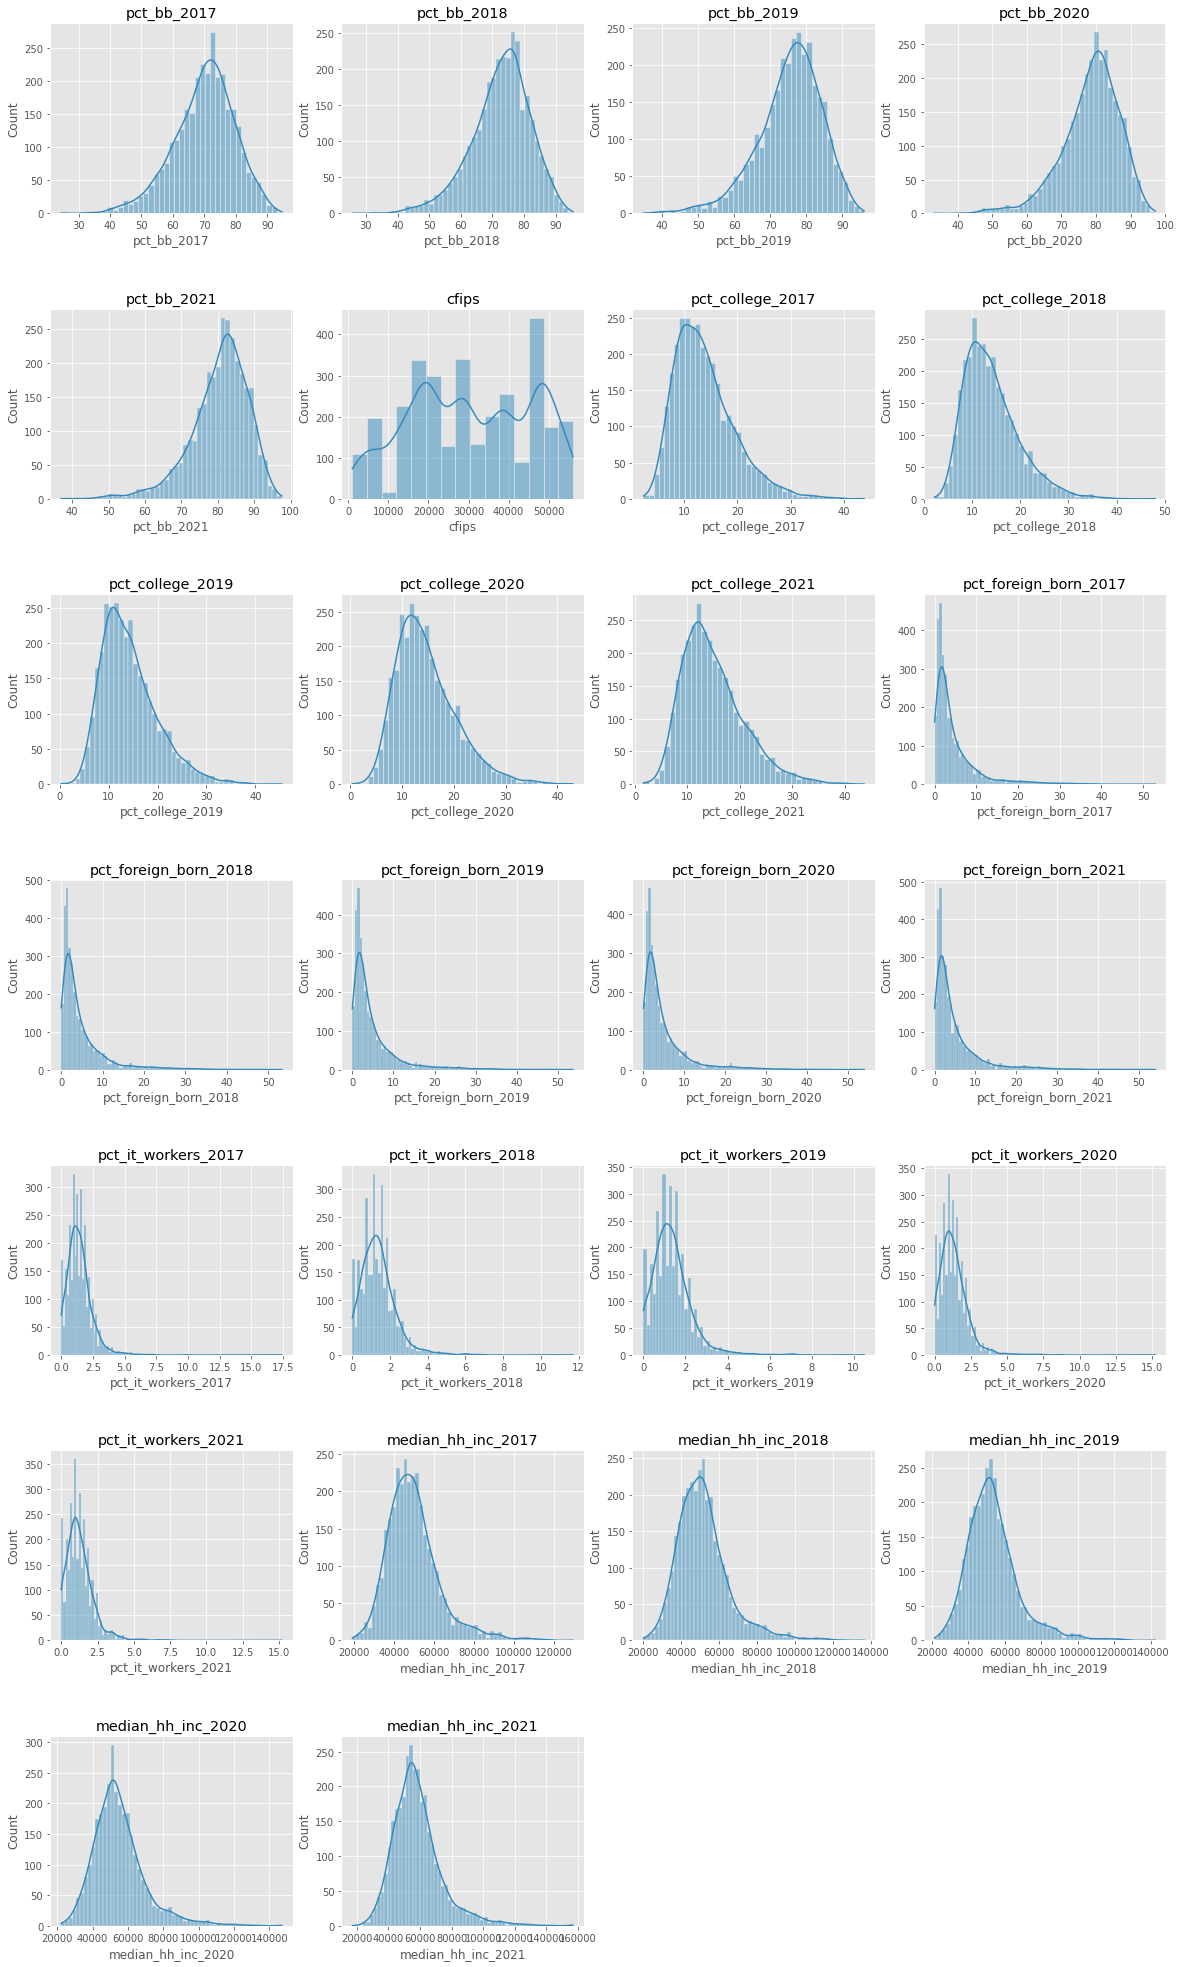

In [22]:
def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.histplot(df[col],kde = kde)

def _distribution_numeric(df, numeric_cols, row=7, col=4, figsize=(20, 35), bins = 10):
    '''
    numeric_cols: list column names
    '''
    print('number of numeric field: ', len(numeric_cols))
    assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break
plt.style.use("ggplot")
numeric_cols = census_df.select_dtypes(include=['float64','int64']).columns
_distribution_numeric(census_df, numeric_cols)

<AxesSubplot:xlabel='microbusiness_density', ylabel='Count'>

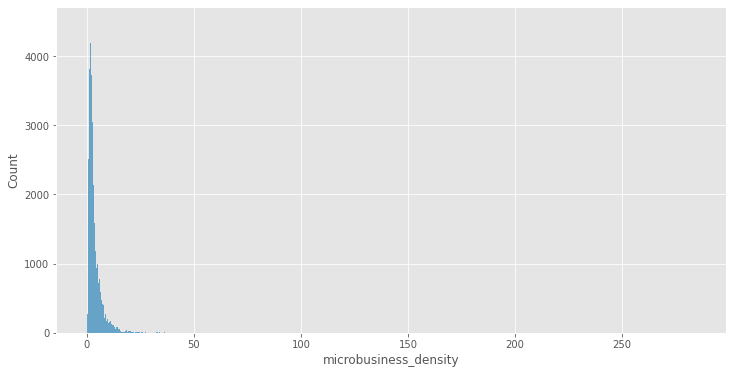

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df["microbusiness_density"])

In [36]:
df["time"] = pd.to_datetime(df["first_day_of_month"])
df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,time
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019-08-01
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019-09-01
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2019-10-01
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,2019-11-01
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,2019-12-01


<AxesSubplot:xlabel='time', ylabel='microbusiness_density'>

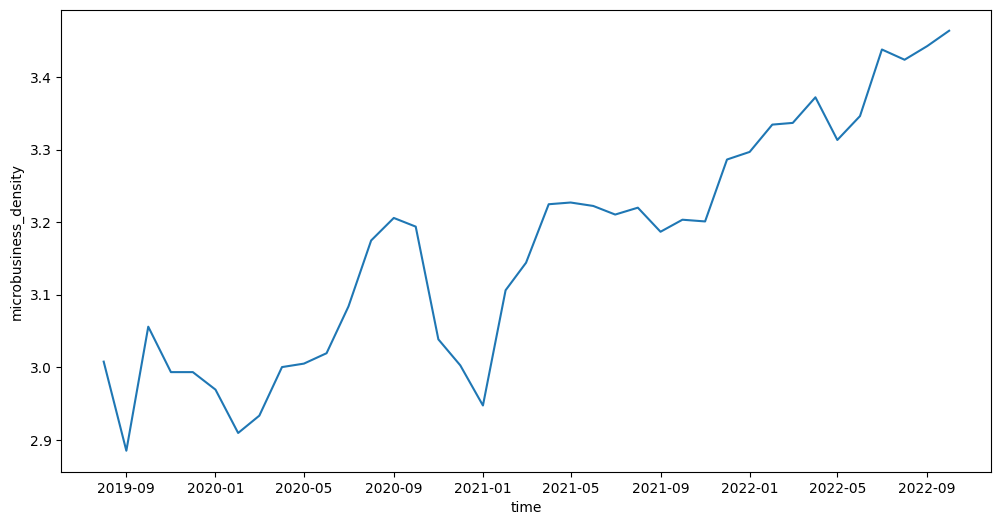

In [60]:
county1 = df[df["cfips"] == 1001]
plt.figure(figsize = (12,6))
plt.style.use("default")
sns.lineplot(x = county1["time"], y = df["microbusiness_density"])

In [ ]:
for row index, row in county1.iterrows():
    if county1["time"].year == 2019:
        county1["bb"] = census_df[census_df["cfips"] == 1001]["pct_bb_2019"]
    if county1["time"].year == 2020:
        county1["bb"] = census_df[census_df["cfips"] == 1001]["pct_bb_2020"]
    if county1["time"].year == 2021:
        county1["bb"] = census_df[census_df["cfips"] == 1001]["pct_bb_2021"]
        
    

In [52]:
census_time = pd.DataFrame()
census_time["bb"]

Note: you may need to restart the kernel to use updated packages.


# ARIMA and SARIMA

In [69]:
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time

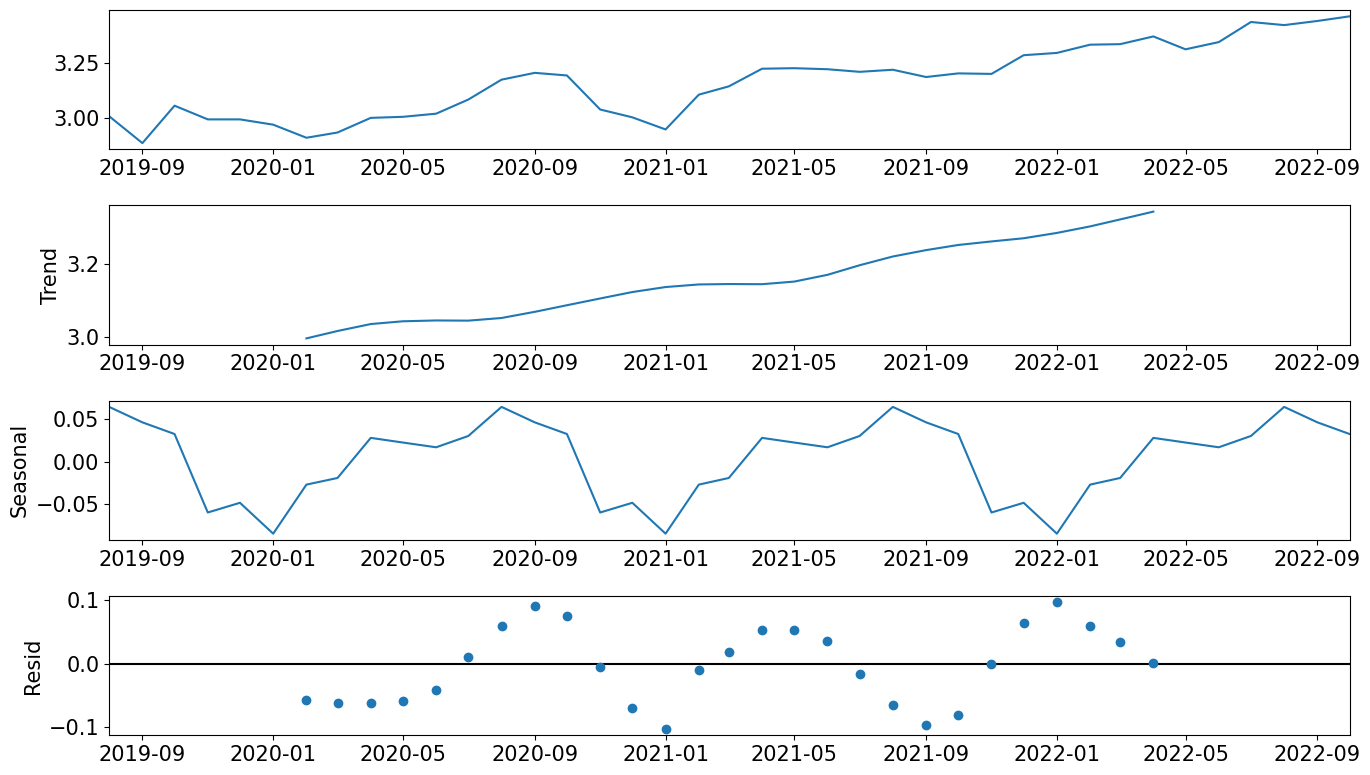

In [83]:
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

limcounty1 = pd.DataFrame(county1["microbusiness_density"])
limcounty1 = limcounty1.set_index(county1["time"])
result = seasonal_decompose(limcounty1,model='additive')
fig = result.plot()

In [ ]:
#Standard ARIMA Model
arima = ARIMA(limcounty1['microbusiness_density'], order=(12,1,1))
predictions = arima.fit().predict()

In [66]:
#Standard ARIMA Model
ARIMA_model = pm.auto_arima(county1['microbusiness_density'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

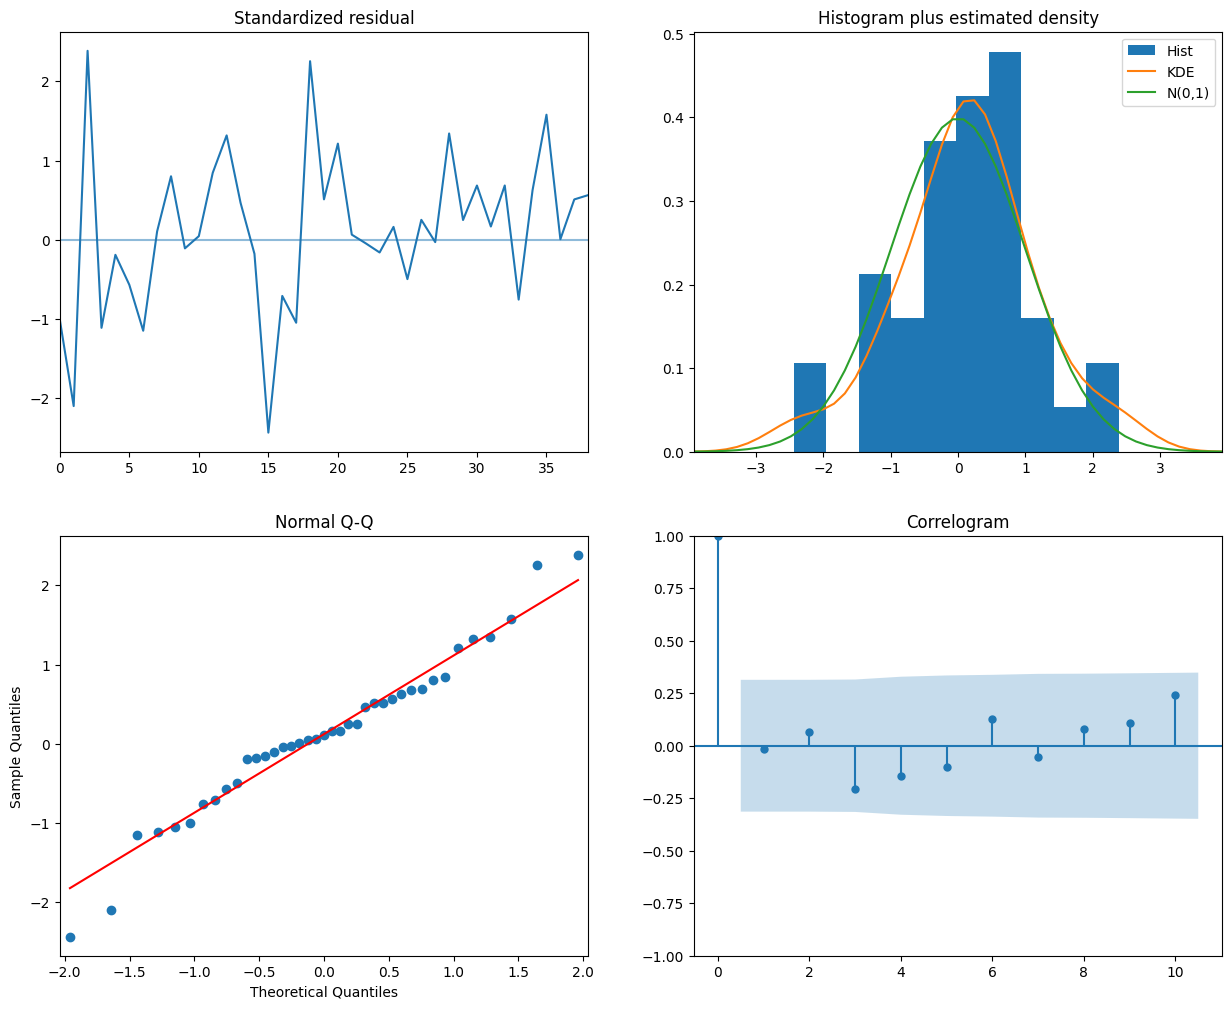

In [67]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [87]:
len(county1)

39

In [90]:
predictions = ARIMA_model.predict()

39    3.447797
40    3.432702
41    3.418513
42    3.405175
43    3.392637
44    3.380851
45    3.369773
46    3.359359
47    3.349570
48    3.340368
dtype: float64

In [97]:
limcounty1.tail()

,microbusiness_density
time,
2022-06-01,3.346197
2022-07-01,3.437971
2022-08-01,3.423852
2022-09-01,3.442677
2022-10-01,3.463856


In [105]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(limcounty1["microbusiness_density"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

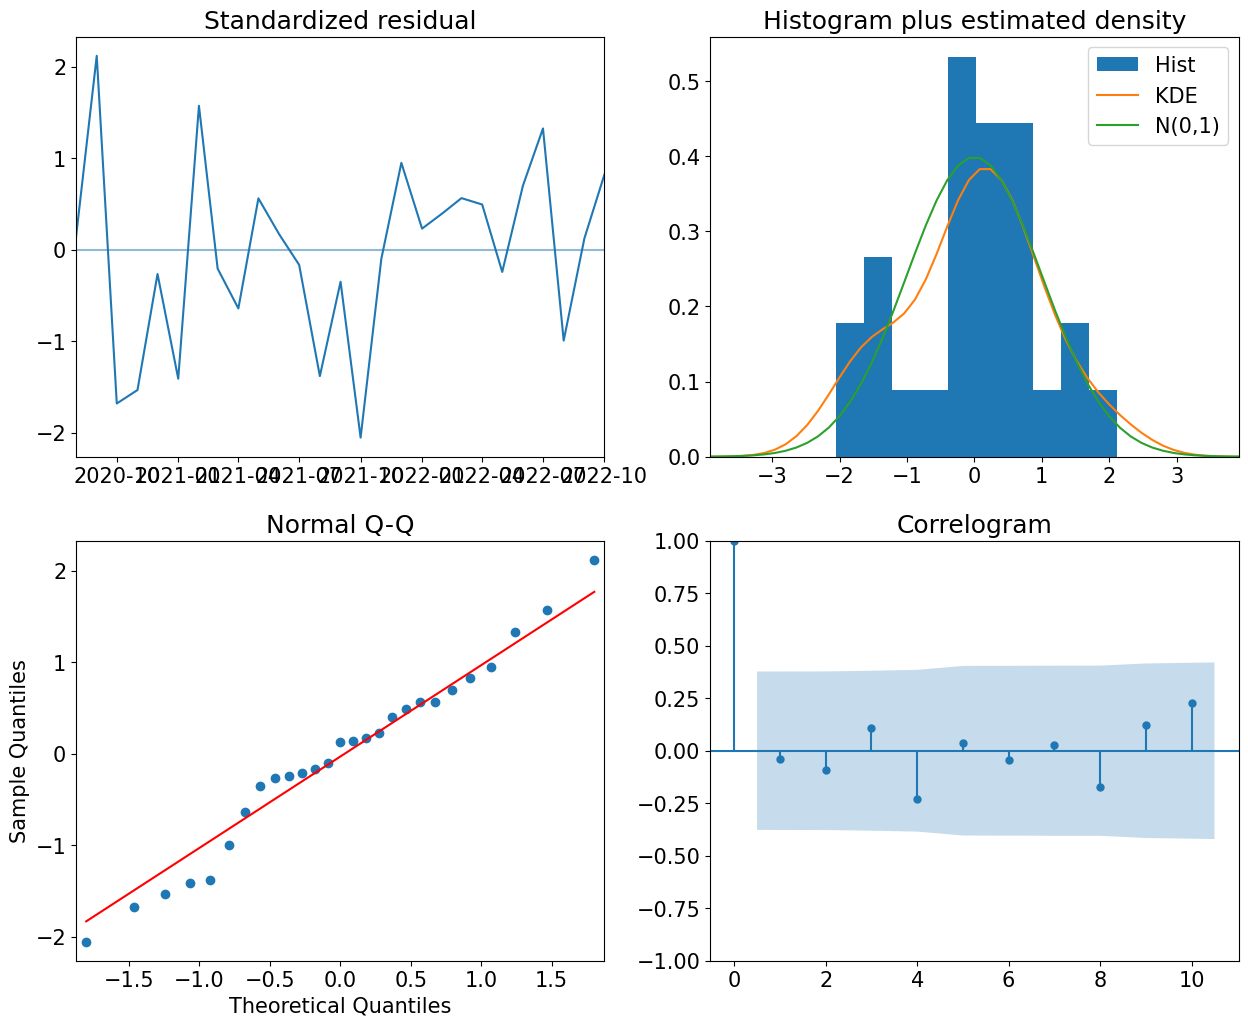

In [106]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [107]:
pred2 = SARIMA_model.predict()
pred2

2022-11-01    3.369528
2022-12-01    3.378300
2023-01-01    3.338953
2023-02-01    3.439274
2023-03-01    3.461687
2023-04-01    3.527255
2023-05-01    3.507218
2023-06-01    3.521796
2023-07-01    3.555460
2023-08-01    3.552671
Freq: MS, dtype: float64

In [120]:
test["microbusiness_density"] = 0

In [ ]:
cfips = 1001
y = df[df["cfips"] == cfips][["microbusiness_density","time"]]
SARIMA_model = pm.auto_arima(y["microbusiness_density"], start_p=1, start_q=1,
                     test='adf',
                     max_p=3, max_q=3, 
                     m=12, #12 is the frequncy of the cycle
                     start_P=0, 
                     seasonal=True, #set to seasonal
                     d=None, 
                     D=1, #order of the seasonal differencing
                     trace=False,
                     error_action='ignore',  
                     suppress_warnings=True, 
                     stepwise=True)
pred = SARIMA_model.predict(n_periods = len(test[test['cfips'] == cfips]))
test['microbusiness_density'].loc[test['cfips'] == cfips] = pred.values
test

In [114]:
# for cfips in tqdm(df["cfips"].unique()):
#     y = df[df["cfips"] == cfips][["microbusiness_density","time"]]
#     SARIMA_model = pm.auto_arima(y["microbusiness_density"], start_p=1, start_q=1,
#                          test='adf',
#                          max_p=3, max_q=3, 
#                          m=12, #12 is the frequncy of the cycle
#                          start_P=0, 
#                          seasonal=True, #set to seasonal
#                          d=None, 
#                          D=1, #order of the seasonal differencing
#                          trace=False,
#                          error_action='ignore',  
#                          suppress_warnings=True, 
#                          stepwise=True)
#     pred = SARIMA_model.predict(n_periods = len(test[test['cfips'] == cfips]))
#     test['microbusiness_density'].loc[test['cfips'] == cfips] = pred.values


  0%|          | 0/3135 [00:00<?, ?it/s]/var/folders/23/9f15z0c11jz_sy9hlr5w468h0000gn/T/ipykernel_34184/3553729515.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[test["cfips"] == cfips]["microbusiness_density"] = pred
  0%|          | 1/3135 [00:13<11:43:12, 13.46s/it]/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/folders/23/9f15z0c11jz_sy9hlr5w468h0000gn/T/ipykernel_34184/3553729515.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



KeyboardInterrupt: 